In [160]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [161]:
df= pd.read_csv('IPL_data_wih_all_features_till_2022.csv')

In [162]:
df.head(2)

,Unnamed: 0,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
0,0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,1,Powerplay,0,1,1,222,0.0
1,1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,222,0.0


In [163]:
df = df.drop('Unnamed: 0' , axis =1 )

In [164]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,1,Powerplay,0,1,1,222,0.0
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,222,0.0
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,3,Powerplay,0,1,2,222,1.0
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,4,Powerplay,0,0,2,222,0.0
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,5,Powerplay,0,0,2,222,0.0


In [165]:
df.shape

(225954, 36)

In [166]:
df['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [167]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [168]:
df['innings'].unique()

array([1, 2], dtype=int64)

In [169]:
df.shape

(225793, 36)

In [170]:
df.season.unique()

array(['2007/08', '2009', '2009/10', '2011', 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021', 2021,
       2022], dtype=object)

In [171]:
df['season'] = df['season'].astype('str')

In [172]:
df['season'] = df['season'].map({'2007/08': '2008' , '2009/10': '2010' , '2020/21':'2020' , '2009':'2009' , '2011':'2011', '2012':'2012','2013':'2013','2014':'2014','2015':'2015','2016':'2016','2017':'2017','2019':'2019','2018':'2018' , '2021':'2021','2022':'2022'})

In [173]:
df.season.unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2019', '2018', '2020', '2021', '2022'],
      dtype=object)

In [174]:
virat = df[df['striker'] == 'V Kohli']

In [175]:
virat.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
132,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,I Sharma,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,2,2,Powerplay,0,0,4,82,0.0
133,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.3,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,I Sharma,0,4,0.0,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,2,3,Powerplay,0,4,8,82,0.0
134,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.4,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,I Sharma,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,2,4,Powerplay,0,1,9,82,1.0
137,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.1,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,AB Dinda,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,3,1,Powerplay,0,0,9,82,0.0
138,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,AB Dinda,0,0,0.0,0.0,NaN,NaN,NaN,bowled,V Kohli,NaN,NaN,1,0,0,0,0,0,3,2,Powerplay,1,0,9,82,0.0


In [561]:
def playerStatistics_overall(df):
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df[df['player_dismissed'] == df['striker']].groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['strike rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['runs per innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['balls Per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = round(df['dots']/df['balls']*100,2)
    
    return df

In [177]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1 
    
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1 

In [562]:
batting = playerStatistics_overall(df).rename(columns = {'striker': 'batsman'})

In [563]:
top_10_batsmen = batting.sort_values(by = 'runs' , ascending=False).head(10)
top_10_batsmen

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
531,V Kohli,215,6624,5262,181,1886,2181,378,19,579,219,125.88,30.81,29.07,6.59,35.84
430,S Dhawan,205,6244,5081,173,1958,1981,279,23,701,137,122.89,30.46,29.37,6.06,38.54
123,DA Warner,162,5881,4308,135,1633,1513,345,23,577,216,136.51,36.30,31.91,5.43,37.91
400,RG Sharma,221,5879,4629,192,1778,1835,248,7,519,241,127.00,26.60,24.11,6.09,38.41
460,SK Raina,200,5528,4174,161,1475,1708,270,11,506,203,132.44,27.64,25.93,5.89,35.34
25,AB de Villiers,170,5162,3479,122,1113,1417,268,17,413,251,148.38,30.36,28.52,5.24,31.99
319,MS Dhoni,205,4978,3802,124,1370,1509,333,15,346,229,130.93,24.28,30.66,6.61,36.03
102,CH Gayle,141,4965,3502,124,1634,1012,91,3,405,357,141.78,35.21,28.24,4.60,46.66
420,RV Uthappa,197,4952,3925,175,1598,1416,230,15,481,182,126.17,25.14,22.43,5.92,40.71
239,KD Karthik,207,4376,3383,156,1219,1355,240,6,426,134,129.35,21.14,21.69,6.04,36.03


In [184]:
sns.set_theme(style = 'darkgrid')

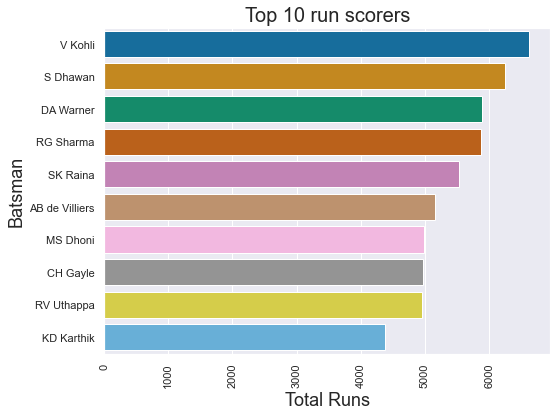

In [204]:
plt.figure(figsize=(8,6))
sns.barplot(top_10_batsmen['runs'] , top_10_batsmen['batsman'] , palette='colorblind')
plt.xticks(rotation='vertical')
plt.xlabel('Total Runs' , fontsize=18)
plt.ylabel('Batsman' , fontsize=18)
plt.title('Top 10 run scorers' , fontsize=20)
plt.show()

In [564]:
top_10_six_hitters = batting.sort_values(by = 'sixes' , ascending=False).head(10)
top_10_six_hitters

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
102,CH Gayle,141,4965,3502,124,1634,1012,91,3,405,357,141.78,35.21,28.24,4.60,46.66
25,AB de Villiers,170,5162,3479,122,1113,1417,268,17,413,251,148.38,30.36,28.52,5.24,31.99
400,RG Sharma,221,5879,4629,192,1778,1835,248,7,519,241,127.00,26.60,24.11,6.09,38.41
319,MS Dhoni,205,4978,3802,124,1370,1509,333,15,346,229,130.93,24.28,30.66,6.61,36.03
234,KA Pollard,168,3412,2433,118,962,869,152,8,218,223,140.24,20.31,20.62,5.52,39.54
531,V Kohli,215,6624,5262,181,1886,2181,378,19,579,219,125.88,30.81,29.07,6.59,35.84
123,DA Warner,162,5881,4308,135,1633,1513,345,23,577,216,136.51,36.30,31.91,5.43,37.91
460,SK Raina,200,5528,4174,161,1475,1708,270,11,506,203,132.44,27.64,25.93,5.89,35.34
477,SR Watson,141,3874,2888,123,1247,931,135,8,376,190,134.14,27.48,23.48,5.10,43.18
420,RV Uthappa,197,4952,3925,175,1598,1416,230,15,481,182,126.17,25.14,22.43,5.92,40.71


In [565]:
top_10_four_hitters = batting.sort_values(by = 'fours' , ascending=False).head(10)
top_10_four_hitters

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
430,S Dhawan,205,6244,5081,173,1958,1981,279,23,701,137,122.89,30.46,29.37,6.06,38.54
531,V Kohli,215,6624,5262,181,1886,2181,378,19,579,219,125.88,30.81,29.07,6.59,35.84
123,DA Warner,162,5881,4308,135,1633,1513,345,23,577,216,136.51,36.30,31.91,5.43,37.91
400,RG Sharma,221,5879,4629,192,1778,1835,248,7,519,241,127.00,26.60,24.11,6.09,38.41
460,SK Raina,200,5528,4174,161,1475,1708,270,11,506,203,132.44,27.64,25.93,5.89,35.34
163,G Gambhir,151,4217,3524,128,1357,1352,249,15,492,59,119.67,27.93,27.53,6.40,38.51
420,RV Uthappa,197,4952,3925,175,1598,1416,230,15,481,182,126.17,25.14,22.43,5.92,40.71
44,AM Rahane,148,4074,3465,127,1341,1371,227,15,431,80,117.58,27.53,27.28,6.78,38.70
239,KD Karthik,207,4376,3383,156,1219,1355,240,6,426,134,129.35,21.14,21.69,6.04,36.03
25,AB de Villiers,170,5162,3479,122,1113,1417,268,17,413,251,148.38,30.36,28.52,5.24,31.99


In [566]:
top_10_strike_rate = batting[batting['balls']>=200].sort_values(by = 'strike rate' , ascending=False).head(10)
top_10_strike_rate

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
34,AD Russell,81,2035,1209,64,507,343,47,0,137,175,168.32,25.12,18.89,3.88,41.94
272,LS Livingstone,23,549,352,20,133,127,12,2,38,40,155.97,23.87,17.60,4.51,37.78
474,SP Narine,82,1025,664,64,321,141,25,1,112,63,154.37,12.50,10.38,3.79,48.34
103,CH Morris,49,618,413,28,134,163,39,1,41,35,149.64,12.61,14.75,5.43,32.45
533,V Sehwag,104,2728,1833,95,737,558,96,2,334,106,148.83,26.23,19.29,4.17,40.21
25,AB de Villiers,170,5162,3479,122,1113,1417,268,17,413,251,148.38,30.36,28.52,5.24,31.99
172,GJ Maxwell,105,2319,1570,87,601,527,113,4,198,127,147.71,22.09,18.05,4.83,38.28
464,SM Curran,23,337,230,15,91,73,18,0,30,18,146.52,14.65,15.33,4.79,39.57
422,Rashid Khan,41,313,214,28,90,64,17,1,20,22,146.26,7.63,7.64,5.10,42.06
362,PJ Cummins,29,379,260,20,110,73,27,0,24,26,145.77,13.07,13.00,5.20,42.31


In [567]:
top_10_dot_balls = batting[batting['balls']>=200].sort_values(by = 'dot%' , ascending=False).head(10)
top_10_dot_balls.iloc[:,[0,1,2,3,-1]]

,batsman,innings,runs,balls,dot%
229,K Goel,16,218,239,54.39
526,UBT Chand,20,300,314,54.14
360,PC Valthaty,23,505,432,53.24
482,ST Jayasuriya,30,768,573,50.96
318,MS Bisla,39,798,737,50.88
441,S Sohal,20,368,311,50.80
453,SC Ganguly,56,1349,1326,49.92
49,AP Tare,27,339,285,49.82
101,CA Pujara,22,390,403,49.63
178,HH Gibbs,36,886,837,48.98


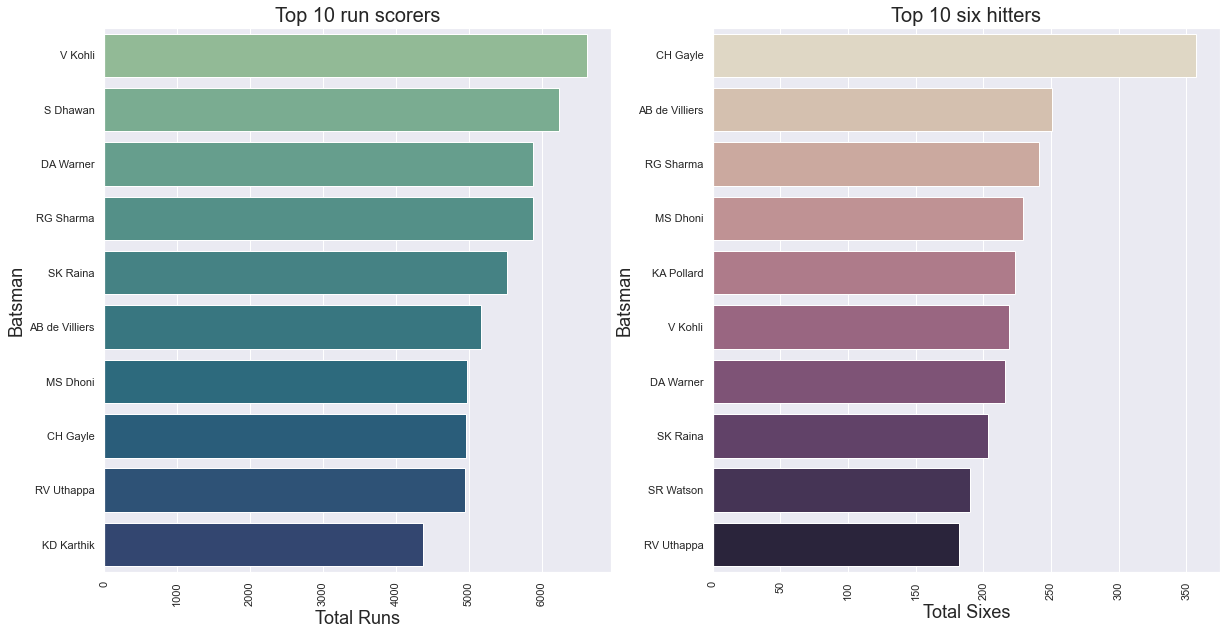

In [248]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(top_10_batsmen['runs'] , top_10_batsmen['batsman'] , palette='crest')
plt.xticks(rotation='vertical')
plt.xlabel('Total Runs' , fontsize=18)
plt.ylabel('Batsman' , fontsize=18)
plt.title('Top 10 run scorers' , fontsize=20)


plt.subplot(1,2,2)
sns.barplot(top_10_six_hitters['sixes'] , top_10_six_hitters['batsman'] , palette='ch:s=-.2,r=.6')
plt.xticks(rotation='vertical')
plt.xlabel('Total Sixes' , fontsize=18)
plt.title('Top 10 six hitters' , fontsize=20)
plt.ylabel('Batsman' , fontsize=18)

plt.show()

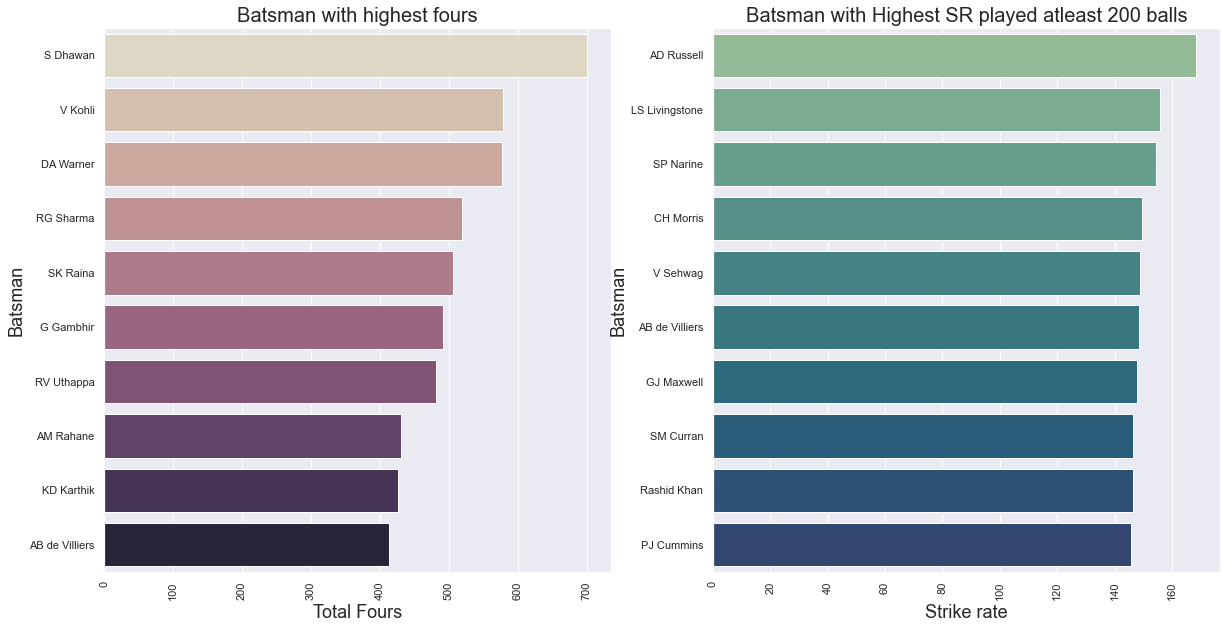

In [249]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(top_10_four_hitters['fours'] , top_10_four_hitters['batsman'] , palette='ch:s=-.2,r=.6')
plt.xticks(rotation='vertical')
plt.xlabel('Total Fours' , fontsize=18)
plt.ylabel('Batsman' , fontsize=18)
plt.title('Batsman with highest fours' , fontsize=20)



plt.subplot(1,2,2)
sns.barplot(top_10_strike_rate['strike rate'] , top_10_strike_rate['batsman'] , palette='crest')
plt.xticks(rotation='vertical')
plt.xlabel('Strike rate' , fontsize=18)
plt.ylabel('Batsman' , fontsize=18)
plt.title('Batsman with Highest SR played atleast 200 balls' , fontsize=20)
plt.show()

In [568]:
def playerStatistics_individual(df, batsman):
    
    df =df[df['striker'] == batsman]
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['striker'])['runs_off_bat'].sum().reset_index()).groupby(['striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df[df['player_dismissed'] == df['striker']].groupby(['striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    dots = pd.DataFrame(df.groupby(['striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'striker').merge(balls, on = 'striker').merge(dismissals, on = 'striker').merge(dots, on = 'striker').merge(ones, on = 'striker').merge(twos, on = 'striker').merge(threes, on = 'striker').merge(fours, on = 'striker').merge(sixes, on = 'striker')

    #StrikeRate
    df['strike rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['runs per innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['balls Per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = round(df['dots']/df['balls']*100,2)
    
    return df

In [569]:
playerStatistics_individual(df ,'V Kohli').rename(columns = {'striker': 'batsman'})

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
0,V Kohli,215,6624,5262,181,1886,2181,378,19,579,219,125.88,30.81,29.07,6.59,35.84


In [259]:
virat['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2019', '2018', '2020', '2021', '2022'],
      dtype=object)

In [260]:
virat_runs_by_season = virat.groupby('season')['runs_off_bat'].sum().reset_index().rename(columns ={'runs_off_bat': 'Total Runs' , 'season':'Season'})

In [261]:
virat_runs_by_season

,Season,Total Runs
0,2008,165
1,2009,246
2,2010,307
3,2011,557
4,2012,364
5,2013,634
6,2014,359
7,2015,505
8,2016,973
9,2017,308


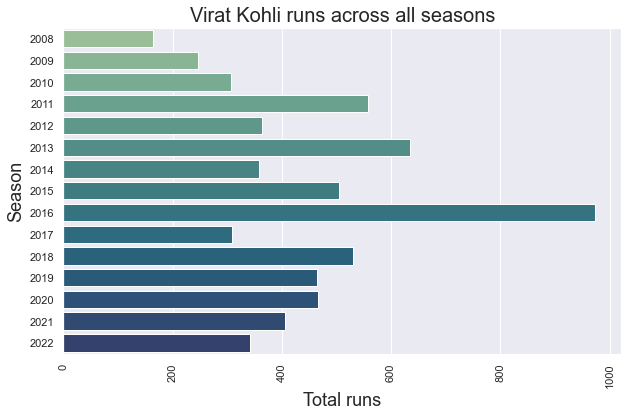

In [307]:
plt.figure(figsize=(10,6))
sns.barplot(virat_runs_by_season['Total Runs'], virat_runs_by_season['Season'], palette='crest')
plt.xticks(rotation='vertical')
plt.xlabel('Total runs' , fontsize=18)
plt.ylabel('Season' , fontsize=18)
plt.title('Virat Kohli runs across all seasons' , fontsize=20)
plt.show()

In [574]:
def playerStatistics_by_season(df):
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['season'])['runs_off_bat'].sum().reset_index()).groupby(['season'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['season'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['season'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df[df['player_dismissed'] == df['striker']].groupby(['season'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})
    dots = pd.DataFrame(df.groupby(['season'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['season'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['season'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['season'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['season'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['season'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'season').merge(balls, on = 'season').merge(dismissals, on = 'season').merge(dots, on = 'season').merge(ones, on = 'season').merge(twos, on = 'season').merge(threes, on = 'season').merge(fours, on = 'season').merge(sixes, on = 'season')

    #seasonate
    df['strike rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['runs per innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['balls per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = round(df['dots']/df['balls']*100,2)
    
    return df

In [576]:
virat_stats_by_season = playerStatistics_by_season(virat)
virat_stats_by_season[['season' ,'innings' , 'runs' , 'balls' , 'fours' , 'sixes']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
innings,12,13,13,16,15,16,14,16,16,10,14,14,15,15,16
runs,165,246,307,557,364,634,359,505,973,308,530,464,466,405,341
balls,168,225,216,473,333,469,301,395,655,257,385,332,400,347,306
fours,18,22,26,55,33,64,23,35,84,23,52,46,23,43,32
sixes,4,8,12,16,10,22,16,23,38,11,18,13,11,9,8


In [579]:
def playerStatistics_vs_bowler(df):
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['bowler'])['runs_off_bat'].sum().reset_index()).groupby(['bowler'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df[df['player_dismissed'] == df['striker']].groupby(['bowler'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(ones, on = 'bowler').merge(twos, on = 'bowler').merge(threes, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler')

    #bowlerate
    df['strike rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['runs per innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['balls per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = round(df['dots']/df['balls']*100,2)
    
    return df

In [580]:
playerStatistics_vs_bowler(virat).sort_values(by= 'runs' ,ascending = False).head(10)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls per dismissal,balls per boundary,dot%
82,R Ashwin,19,160,131,1,44,64,4,0,13,6,122.14,8.42,131.00,6.89,33.59
1,A Mishra,13,158,103,2,30,46,6,0,13,8,153.40,12.15,51.50,4.90,29.13
27,DJ Bravo,12,157,110,2,39,36,13,1,17,4,142.73,13.08,55.00,5.24,35.45
106,UT Yadav,12,150,87,4,25,34,5,0,16,7,172.41,12.50,21.75,3.78,28.74
85,RA Jadeja,17,140,134,3,44,66,14,0,7,3,104.48,8.24,44.67,13.40,32.84
41,JJ Bumrah,15,140,93,4,34,30,7,2,15,5,150.54,9.33,23.25,4.65,36.56
77,PP Chawla,14,123,94,3,29,43,9,0,8,5,130.85,8.79,31.33,7.23,30.85
22,CH Morris,10,109,73,2,24,28,5,1,11,4,149.32,10.90,36.50,4.87,32.88
29,DS Kulkarni,11,101,82,4,32,29,7,0,13,1,123.17,9.18,20.50,5.86,39.02
98,SP Narine,13,101,98,3,38,41,9,0,9,1,103.06,7.77,32.67,9.80,38.78


In [322]:
playerStatistics_vs_bowler(virat).sort_values(by= 'fours' ,ascending = False).head(12).iloc[:,[0,1,9]]

,bowler,innings,fours
57,DJ Bravo,12,17
233,UT Yadav,12,16
83,IK Pathan,9,15
97,JJ Bumrah,15,15
150,Mohammed Shami,11,14
176,R Ashwin,19,13
3,A Mishra,13,13
67,DS Kulkarni,11,13
62,DL Chahar,8,11
45,CH Morris,10,11


In [321]:
playerStatistics_vs_bowler(virat).sort_values(by= 'sixes' ,ascending = False).head(12).iloc[:,[0,1,10]]

,bowler,innings,sixes
3,A Mishra,13,8
233,UT Yadav,12,7
191,RP Singh,9,6
176,R Ashwin,19,6
108,KC Cariappa,2,6
197,S Gopal,6,5
80,Harpreet Brar,4,5
78,Harbhajan Singh,14,5
97,JJ Bumrah,15,5
170,PP Chawla,14,5


In [581]:
playerStatistics_vs_bowler(virat).sort_values(by= 'dismissals' ,ascending = False).head(10).iloc[:,[0,1,4]]

,bowler,innings,dismissals
101,Sandeep Sharma,14,7
2,A Nehra,10,6
67,Mohammed Shami,11,5
106,UT Yadav,12,4
41,JJ Bumrah,15,4
29,DS Kulkarni,11,4
63,MJ McClenaghan,8,4
58,M Morkel,10,3
40,JH Kallis,6,3
47,K Rabada,6,3


In [529]:
dots_vs_virat = playerStatistics_vs_bowler(virat).sort_values(by= 'dot%' ,ascending = False)
dots_vs_virat[dots_vs_virat['balls']>=20].head(10).iloc[: , [0,1,3,5,-1]]

,bowler,innings,balls,dots,dot%
229,TA Boult,7,51,29,56.86
203,S Sreesanth,4,30,17,56.67
80,Harpreet Brar,4,39,21,53.85
217,SR Watson,7,26,14,53.85
211,SK Warne,4,28,15,53.57
9,AB Dinda,5,30,16,53.33
4,A Nehra,10,57,30,52.63
188,RJ Harris,4,21,11,52.38
119,L Balaji,6,25,13,52.00
96,JH Kallis,6,35,18,51.43


In [333]:
sr_vs_virat = playerStatistics_vs_bowler(virat).sort_values(by= 'strike rate' ,ascending = False)
sr_vs_virat[dots_vs_virat['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,bowler,innings,runs,balls,strike rate
199,S Kaushik,2,50,23,217.39
113,KV Sharma,6,89,46,193.48
197,S Gopal,6,68,39,174.36
233,UT Yadav,12,150,87,172.41
215,SN Thakur,7,67,42,159.52
191,RP Singh,9,62,39,158.97
159,NLTC Perera,4,66,42,157.14
134,M Prasidh Krishna,7,56,36,155.56
177,R Bhatia,4,40,26,153.85
77,HV Patel,3,43,28,153.57


In [101]:
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'isDot', 'isOne', 'isTwo', 'isThree',
       'isFour', 'isSix', 'over_num', 'ball_num', 'Phase_of_play',
       'isBowlerWk', 'runs', 'current_score', 'Total_score',
       'runs_not_counting_for_maiden_overs'],
      dtype='object')

In [341]:
def playerStatistics_vs_bowling_team(df):
    
    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['bowling_team'])['runs_off_bat'].sum().reset_index()).groupby(['bowling_team'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['bowling_team'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['bowling_team'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['bowling_team'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['bowling_team'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowling_team'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowling_team'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowling_team'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowling_team'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowling_team'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'bowling_team').merge(balls, on = 'bowling_team').merge(dismissals, on = 'bowling_team').merge(dots, on = 'bowling_team').merge(ones, on = 'bowling_team').merge(twos, on = 'bowling_team').merge(threes, on = 'bowling_team').merge(fours, on = 'bowling_team').merge(sixes, on = 'bowling_team')

    #bowling_teamate
    df['strike rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['runs per innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['balls per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = df['dots']/df['balls']*100
    
    return df

In [342]:
playerStatistics_vs_bowling_team(virat)

,bowling_team,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls per dismissal,balls per boundary,dot%
0,Chennai Super Kings,29,979,806,28,301,328,63,5,72,37,121.46,33.76,28.79,7.39,37.344913
1,Deccan Chargers,10,306,230,9,88,80,25,0,23,14,133.04,30.60,25.56,6.22,38.260870
2,Delhi Capitals,7,164,150,7,50,76,9,0,10,5,109.33,23.43,21.43,10.00,33.333333
3,Delhi Daredevils,18,761,553,15,158,266,32,1,74,22,137.61,42.28,36.87,5.76,28.571429
4,Gujarat Lions,5,283,186,4,52,78,20,1,24,11,152.15,56.60,46.50,5.31,27.956989
5,Gujarat Titans,2,131,110,2,39,51,3,0,14,3,119.09,65.50,55.00,6.47,35.454545
6,Kings XI Punjab,25,681,541,24,211,205,30,0,77,18,125.88,27.24,22.54,5.69,39.001848
7,Kochi Tuskers Kerala,2,50,52,1,26,16,3,0,7,0,96.15,25.00,52.00,7.43,50.000000
8,Kolkata Knight Riders,27,786,613,22,206,259,53,3,70,22,128.22,29.11,27.86,6.66,33.605220
9,Lucknow Super Giants,2,25,27,2,13,8,3,1,2,0,92.59,12.50,13.50,13.50,48.148148


In [582]:
def playerStatistics_phase_of_play(df):
    
    
    


    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['Phase_of_play'])['runs_off_bat'].sum().reset_index()).groupby(['Phase_of_play'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['Phase_of_play'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['Phase_of_play'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df[df['player_dismissed'] == df['striker']].groupby(['Phase_of_play'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['Phase_of_play'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['Phase_of_play'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['Phase_of_play'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['Phase_of_play'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['Phase_of_play'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['Phase_of_play'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'Phase_of_play').merge(balls, on = 'Phase_of_play').merge(dismissals, on = 'Phase_of_play').merge(dots, on = 'Phase_of_play').merge(ones, on = 'Phase_of_play').merge(twos, on = 'Phase_of_play').merge(threes, on = 'Phase_of_play').merge(fours, on = 'Phase_of_play').merge(sixes, on = 'Phase_of_play')

    #Phase_of_playate
    df['Strike Rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #balls per dismissals
    df['balls per dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['balls per boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    #dot ball percentage
    df['dot%'] = round(df['dots']/df['balls']*100,2)
    
    return df

In [583]:
playerStatistics_phase_of_play(virat).sort_values(by = 'innings' , ascending= False)

,Phase_of_play,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Strike Rate,balls per dismissal,balls per boundary,dot%
2,Powerplay,164,2125,1877,57,878,593,84,10,269,43,113.21,32.93,6.02,46.78
1,Middle,150,3201,2660,71,815,1319,205,6,218,97,120.34,37.46,8.44,30.64
0,Death,78,1298,725,53,193,269,89,3,92,79,179.03,13.68,4.24,26.62


In [348]:
def playerStatistics_with_non_striker(df):
    
    
    


    df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


    runs = pd.DataFrame(df.groupby(['non_striker'])['runs_off_bat'].sum().reset_index()).groupby(['non_striker'])['runs_off_bat'].sum().reset_index().rename(columns={'runs_off_bat':'runs'})
    innings = pd.DataFrame(df.groupby(['non_striker'])['match_id'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'match_id':'innings'})
    balls = pd.DataFrame(df.groupby(['non_striker'])['match_id'].count()).reset_index().rename(columns = {'match_id':'balls'})
    dismissals = pd.DataFrame(df.groupby(['non_striker'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})

    dots = pd.DataFrame(df.groupby(['non_striker'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['non_striker'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['non_striker'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['non_striker'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['non_striker'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['non_striker'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

    df = pd.merge(innings, runs, on = 'non_striker').merge(balls, on = 'non_striker').merge(dismissals, on = 'non_striker').merge(dots, on = 'non_striker').merge(ones, on = 'non_striker').merge(twos, on = 'non_striker').merge(threes, on = 'non_striker').merge(fours, on = 'non_striker').merge(sixes, on = 'non_striker')

    #non_strikerate
    df['Strike Rate'] = df.apply(lambda x: round(100*(x['runs']/x['balls']),2), axis = 1)

    #runs per innings
    df['Runs Per Innings'] = df.apply(lambda x: round(x['runs']/x['innings'],2), axis = 1)

    #balls per dismissals
    df['Balls Per Dismissal'] = df.apply(lambda x: round(balls_per_dismissal(x['balls'], x['dismissals']),2), axis = 1)

    #balls per boundary
    df['Balls Per Boundary'] = df.apply(lambda x: round(balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])),2), axis = 1)
    
    return df

In [351]:
x = playerStatistics_with_non_striker(virat).sort_values(by = 'Strike Rate' , ascending = False)
x[x['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,non_striker,innings,runs,balls,Strike Rate
46,MP Stoinis,2,56,27,207.41
77,TM Head,5,86,46,186.96
3,AD Nath,2,42,24,175.00
34,KP Pietersen,3,71,43,165.12
66,S Dube,2,62,38,163.16
39,M Vohra,1,31,20,155.00
55,Q de Kock,5,115,76,151.32
71,SR Watson,5,61,41,148.78
42,MC Henriques,6,142,99,143.43
83,Yuvraj Singh,6,126,88,143.18


In [352]:
x = playerStatistics_with_non_striker(virat).sort_values(by = 'Strike Rate' , ascending=True)
x[x['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,non_striker,innings,runs,balls,Strike Rate
76,TM Dilshan,8,89,108,82.41
57,R Dravid,9,73,87,83.91
22,GJ Maxwell,8,73,86,84.88
45,MM Ali,5,50,54,92.59
47,MV Boucher,8,46,49,93.88
40,MA Agarwal,7,74,78,94.87
80,W Jaffer,2,29,29,100.00
8,BB McCullum,3,42,42,100.00
60,RM Patidar,4,91,89,102.25
5,AJ Finch,4,35,34,102.94


In [353]:
rcb_df = df[df['batting_team'] == 'Royal Challengers Bangalore']

In [354]:
virat['runs_off_bat'].sum()/rcb_df['runs'].sum()*100

18.845486358075622

In [448]:
season_till_2017 = ['2008' ,'2009' , '2010' , '2011' ,'2012' ,'2013' , '2014' ,'2015' ,'2016', '2017']
season_from_2018 = ['2018','2019','2020','2021','2022']

In [449]:
rcb_df_till_2017 = rcb_df[rcb_df['season'].isin (season_till_2017)]
rcb_df_2018_2022 = rcb_df[rcb_df['season'].isin (season_from_2018)]

In [450]:
rcb_df_till_2017.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
149472,1082646,2017,2017-05-14,Feroz Shah Kotla,1,19.7,Royal Challengers Bangalore,Delhi Daredevils,P Negi,SR Watson,CJ Anderson,4,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,20,7,Death,0,4,160,161,4.0
149473,1082646,2017,2017-05-14,Feroz Shah Kotla,1,19.8,Royal Challengers Bangalore,Delhi Daredevils,P Negi,SR Watson,CJ Anderson,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,20,8,Death,0,1,161,161,1.0


In [453]:
rcb_df_2018_2022['season'].unique()

array(['2019', '2018', '2020', '2021', '2022'], dtype=object)

In [452]:
rcb_df_2018_2022.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
150460,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,Powerplay,0,1,1,70,1.0
150461,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,70,0.0


In [468]:
season_till_2017

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [469]:
season_from_2018

['2018', '2019', '2020', '2021', '2022']

In [470]:
virat_df_till_2017 = virat[virat['season'].isin (season_till_2017)]
virat_df_2018_2022 = virat[virat['season'].isin (season_from_2018)]

In [471]:
virat_df_till_2017.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
149446,1082646,2017,2017-05-14,Feroz Shah Kotla,1,16.2,Royal Challengers Bangalore,Delhi Daredevils,V Kohli,KM Jadhav,Z Khan,6,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,17,2,Death,0,6,118,161,6.0
149447,1082646,2017,2017-05-14,Feroz Shah Kotla,1,16.3,Royal Challengers Bangalore,Delhi Daredevils,V Kohli,KM Jadhav,Z Khan,0,0,0.0,0.0,NaN,NaN,NaN,caught,V Kohli,NaN,NaN,1,0,0,0,0,0,17,3,Death,1,0,118,161,0.0


In [472]:
virat_df_2018_2022.tail(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
225494,1312199,2022,2022-05-27,"Narendra Modi Stadium, Ahmedabad",1,1.4,Royal Challengers Bangalore,Rajasthan Royals,V Kohli,F du Plessis,M Prasidh Krishna,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,2,4,Powerplay,0,0,9,157,0.0
225495,1312199,2022,2022-05-27,"Narendra Modi Stadium, Ahmedabad",1,1.5,Royal Challengers Bangalore,Rajasthan Royals,V Kohli,F du Plessis,M Prasidh Krishna,0,0,0.0,0.0,NaN,NaN,NaN,caught,V Kohli,NaN,NaN,1,0,0,0,0,0,2,5,Powerplay,1,0,9,157,0.0


In [459]:
virat_df_till_2017['runs_off_bat'].sum()/rcb_df_till_2017['runs'].sum()*100

18.87550200803213

In [460]:
virat_df_2018_2022['runs_off_bat'].sum()/rcb_df_2018_2022['runs'].sum()*100

18.78565954185472

In [374]:
virat['runs_off_bat'].sum()/rcb_df['runs'].sum()*100

18.845486358075622

In [378]:
virat['wicket_type'].value_counts()

caught               120
bowled               36 
run out              19 
lbw                  11 
stumped              4  
caught and bowled    3  
Name: wicket_type, dtype: int64

<AxesSubplot:>

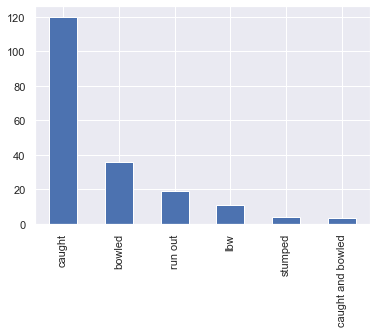

In [380]:
virat['wicket_type'].value_counts().plot(kind = 'bar')

In [475]:
virat_stats_by_season

,season,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls per dismissal,balls per boundary,dot%
0,2008,12,165,168,12,82,59,5,0,18,4,98.21,13.75,14.00,7.64,48.809524
1,2009,13,246,225,11,98,84,13,0,22,8,109.33,18.92,20.45,7.50,43.555556
2,2010,13,307,216,13,61,103,14,0,26,12,142.13,23.62,16.62,5.68,28.240741
3,2011,16,557,473,13,193,178,30,1,55,16,117.76,34.81,36.38,6.66,40.803383
4,2012,15,364,333,12,136,137,16,1,33,10,109.31,24.27,27.75,7.74,40.840841
5,2013,16,634,469,14,176,170,35,2,64,22,135.18,39.62,33.50,5.45,37.526652
6,2014,14,359,301,14,114,127,19,2,23,16,119.27,25.64,21.50,7.72,37.873754
7,2015,16,505,395,14,148,153,34,2,35,23,127.85,31.56,28.21,6.81,37.468354
8,2016,16,973,655,12,184,291,56,2,84,38,148.55,60.81,54.58,5.37,28.091603
9,2017,10,308,257,11,95,107,20,1,23,11,119.84,30.80,23.36,7.56,36.964981


In [476]:
virat_stats_by_season_2018_2022 = virat_stats_by_season[virat_stats_by_season['season'].isin(season_from_2018)]
virat_stats_by_season_2008_2017 = virat_stats_by_season[virat_stats_by_season['season'].isin(season_till_2017)]

In [477]:
virat_stats_by_season_2018_2022

,season,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls per dismissal,balls per boundary,dot%
10,2018,14,530,385,12,125,166,24,0,52,18,137.66,37.86,32.08,5.50,32.467532
11,2019,14,464,332,14,97,150,26,0,46,13,139.76,33.14,23.71,5.63,29.216867
12,2020,15,466,400,11,116,194,54,2,23,11,116.50,31.07,36.36,11.76,29.000000
13,2021,15,405,347,14,134,145,14,2,43,9,116.71,27.00,24.79,6.67,38.616715
14,2022,16,341,306,16,127,117,18,4,32,8,111.44,21.31,19.12,7.65,41.503268


In [478]:
virat_stats_by_season_2008_2017

,season,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls per dismissal,balls per boundary,dot%
0,2008,12,165,168,12,82,59,5,0,18,4,98.21,13.75,14.00,7.64,48.809524
1,2009,13,246,225,11,98,84,13,0,22,8,109.33,18.92,20.45,7.50,43.555556
2,2010,13,307,216,13,61,103,14,0,26,12,142.13,23.62,16.62,5.68,28.240741
3,2011,16,557,473,13,193,178,30,1,55,16,117.76,34.81,36.38,6.66,40.803383
4,2012,15,364,333,12,136,137,16,1,33,10,109.31,24.27,27.75,7.74,40.840841
5,2013,16,634,469,14,176,170,35,2,64,22,135.18,39.62,33.50,5.45,37.526652
6,2014,14,359,301,14,114,127,19,2,23,16,119.27,25.64,21.50,7.72,37.873754
7,2015,16,505,395,14,148,153,34,2,35,23,127.85,31.56,28.21,6.81,37.468354
8,2016,16,973,655,12,184,291,56,2,84,38,148.55,60.81,54.58,5.37,28.091603
9,2017,10,308,257,11,95,107,20,1,23,11,119.84,30.80,23.36,7.56,36.964981


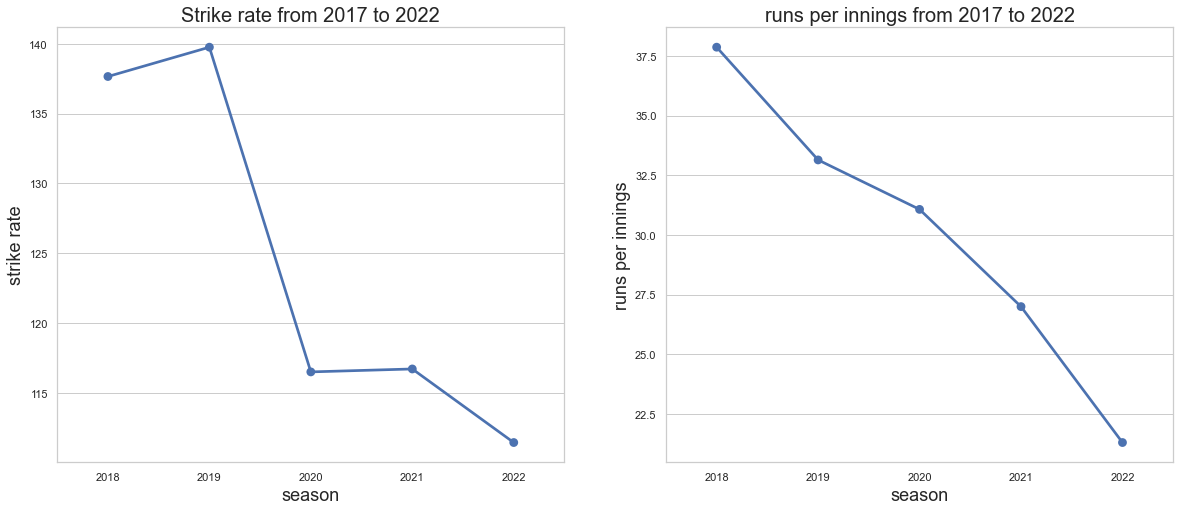

In [479]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['strike rate'])
plt.xlabel('season' , fontsize =18)
plt.ylabel('strike rate', fontsize =18)
plt.title('Strike rate from 2017 to 2022', fontsize =20)


plt.subplot(1,2,2)
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['runs per innings'])
plt.xlabel('season' , fontsize =18)
plt.ylabel('runs per innings', fontsize =18)
plt.title('runs per innings from 2017 to 2022', fontsize =20)
plt.show()

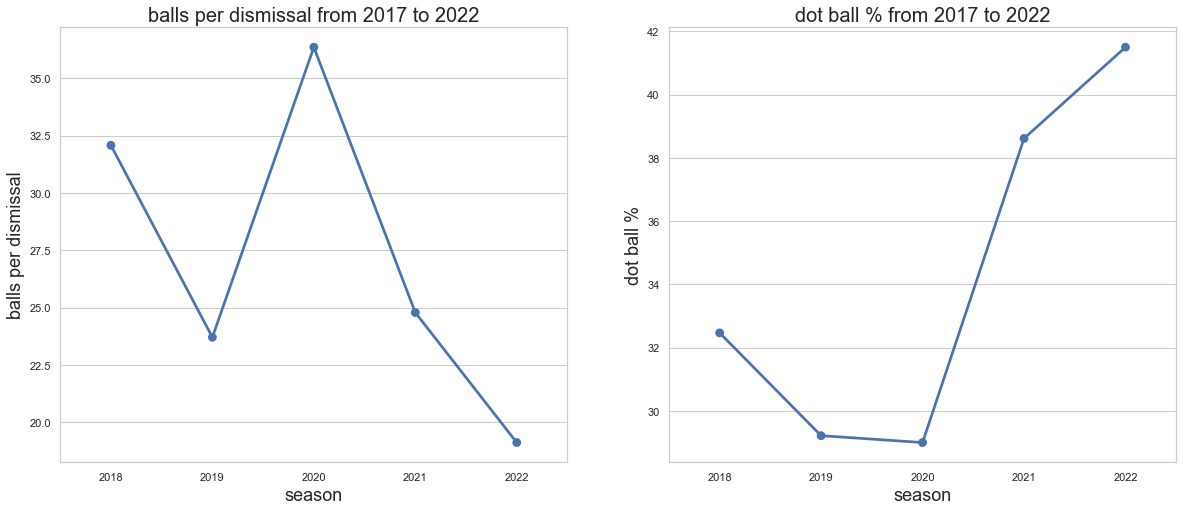

In [480]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['balls per dismissal'])
plt.xlabel('season' , fontsize =18)
plt.ylabel('balls per dismissal', fontsize =18)
plt.title('balls per dismissal from 2017 to 2022', fontsize =20)



plt.subplot(1,2,2)
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['dot%'])
plt.xlabel('season' , fontsize =18)
plt.ylabel('dot ball %', fontsize =18)
plt.title('dot ball % from 2017 to 2022', fontsize =20)
plt.show()

In [584]:
kl_rahul= df[df['striker']=='KL Rahul']
kl_rahul.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
81325,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.2,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,152,0.0
81326,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.3,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,3,Powerplay,0,0,1,152,0.0
81327,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.4,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,4,Powerplay,0,0,1,152,0.0
81328,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.5,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,5,Powerplay,0,0,1,152,0.0
81329,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.6,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,6,Powerplay,0,1,2,152,1.0


In [585]:
playerStatistics_individual(df ,'KL Rahul').rename(columns = {'striker': 'batsman'})

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
0,KL Rahul,99,3889,2927,79,1040,1200,191,5,327,164,132.87,39.28,37.05,5.96,35.53


In [483]:
kl_rahul_stats_by_season = playerStatistics_by_season(kl_rahul)
kl_rahul_stats_by_season[['season' ,'innings' , 'runs' , 'balls' , 'fours' , 'sixes']]

,season,innings,runs,balls,fours,sixes
0,2013,2,20,16,4,0
1,2014,8,166,166,12,3
2,2015,8,142,133,8,5
3,2016,12,397,277,37,16
4,2018,14,659,426,66,32
5,2019,14,593,447,49,25
6,2020,14,670,525,58,23
7,2021,13,626,465,48,30
8,2022,14,616,472,45,30


In [586]:
playerStatistics_phase_of_play(kl_rahul).sort_values(by='balls' ,ascending= False)

,Phase_of_play,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Strike Rate,balls per dismissal,balls per boundary,dot%
2,Powerplay,88,1594,1301,26,599,405,60,3,172,62,122.52,50.04,5.56,46.04
1,Middle,69,1597,1230,35,344,635,85,2,99,65,129.84,35.14,7.50,27.97
0,Death,35,698,396,18,97,160,46,0,56,37,176.26,22.00,4.26,24.49


<AxesSubplot:>

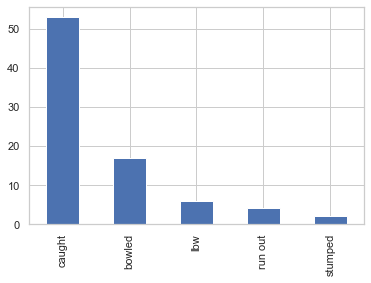

In [430]:
kl_rahul['wicket_type'].value_counts().plot(kind = 'bar')

In [513]:
playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'runs' ,ascending = False).head(12).iloc[:,[0,1,2]]

,bowler,innings,runs
58,JJ Bumrah,12,143
35,DL Chahar,8,120
57,JD Unadkat,6,112
134,SP Narine,9,105
17,B Kumar,7,93
97,Mohammed Siraj,5,91
56,JC Archer,5,89
151,YS Chahal,8,87
48,Harbhajan Singh,8,81
45,HH Pandya,6,80


In [485]:
playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'fours' ,ascending = False).head(12).iloc[:,[0,1,9]]

,bowler,innings,fours
58,JJ Bumrah,12,13
35,DL Chahar,8,13
56,JC Archer,5,11
57,JD Unadkat,6,10
140,TA Boult,8,10
17,B Kumar,7,10
146,UT Yadav,8,9
133,SN Thakur,6,9
101,NA Saini,4,8
134,SP Narine,9,7


In [486]:
playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'sixes' ,ascending = False).head(12).iloc[:,[0,1,10]]

,bowler,innings,sixes
97,Mohammed Siraj,5,8
35,DL Chahar,8,6
134,SP Narine,9,6
90,MJ McClenaghan,7,6
26,CH Morris,5,5
57,JD Unadkat,6,5
141,TG Southee,7,5
140,TA Boult,8,4
58,JJ Bumrah,12,4
40,DW Steyn,1,4


In [587]:
playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'dismissals' ,ascending = False).head(10).iloc[:,[0,1,4]]

,bowler,innings,dismissals
17,DS Kulkarni,7,4
45,Rashid Khan,5,3
19,Harbhajan Singh,8,3
11,C Sakariya,3,2
35,MJ McClenaghan,7,2
37,MM Sharma,5,2
38,Mohammed Shami,3,2
24,K Rabada,5,2
41,PP Chawla,4,2
21,JJ Bumrah,12,2


In [519]:
dots_vs_kl_rahul = playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'dot%' ,ascending = False)
dots_vs_kl_rahul[dots_vs_kl_rahul['balls']>=20].head(10).iloc[: , [0,1,3,5,-1]]

,bowler,innings,balls,dots,dot%
38,DS Kulkarni,7,31,20,64.52
66,K Gowtham,2,23,13,56.52
8,AR Patel,5,35,19,54.29
74,KK Ahmed,4,28,15,53.57
93,MM Sharma,5,28,15,53.57
138,Shivam Mavi,3,28,15,53.57
146,UT Yadav,8,62,32,51.61
1,A Nehra,3,24,12,50.00
68,K Rabada,5,25,12,48.00
90,MJ McClenaghan,7,57,27,47.37


In [489]:
sr_vs_kl_rahul = playerStatistics_vs_bowler(kl_rahul).sort_values(by= 'strike rate' ,ascending = False)
sr_vs_kl_rahul[dots_vs_kl_rahul['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,bowler,innings,runs,balls,strike rate
95,Mohammad Nabi,3,55,21,261.90
97,Mohammed Siraj,5,91,48,189.58
133,SN Thakur,6,75,43,174.42
57,JD Unadkat,6,112,65,172.31
26,CH Morris,5,72,43,167.44
25,C Sakariya,3,55,33,166.67
45,HH Pandya,6,80,48,166.67
140,TA Boult,8,80,51,156.86
35,DL Chahar,8,120,79,151.90
134,SP Narine,9,105,70,150.00


In [490]:
x = playerStatistics_with_non_striker(kl_rahul).sort_values(by = 'Strike Rate' , ascending = False)
x[x['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,non_striker,innings,runs,balls,Strike Rate
25,MP Stoinis,7,158,73,216.44
0,A Badoni,2,51,26,196.15
17,KK Nair,7,138,75,184.00
5,AK Markram,3,53,30,176.67
23,MK Pandey,3,78,48,162.50
19,M Shahrukh Khan,4,51,32,159.38
8,DA Miller,6,98,62,158.06
37,V Kohli,9,282,194,145.36
35,SR Watson,3,38,27,140.74
1,AB de Villiers,4,54,39,138.46


In [491]:
x = playerStatistics_with_non_striker(kl_rahul).sort_values(by = 'Strike Rate' , ascending=True)
x[x['balls']>=20].head(10).iloc[:,[0,1,2,3,11]]

,non_striker,innings,runs,balls,Strike Rate
28,NV Ojha,5,13,20,65.00
9,DA Warner,6,58,65,89.23
11,DJG Sammy,2,22,21,104.76
31,RS Bopara,2,43,41,104.88
30,Q de Kock,14,229,201,113.93
18,KV Sharma,3,23,20,115.00
3,AJ Finch,8,135,113,119.47
34,SN Khan,1,54,44,122.73
7,CH Gayle,37,705,562,125.44
26,Mandeep Singh,7,113,89,126.97


In [531]:
kl_rahul_stats_by_season_2018_2022 = kl_rahul_stats_by_season[kl_rahul_stats_by_season['season'].isin(season_from_2018)]

In [493]:
kl_rahul_stats_by_season_2017_2022['season'].unique()

array(['2018', '2019', '2020', '2021', '2022'], dtype=object)

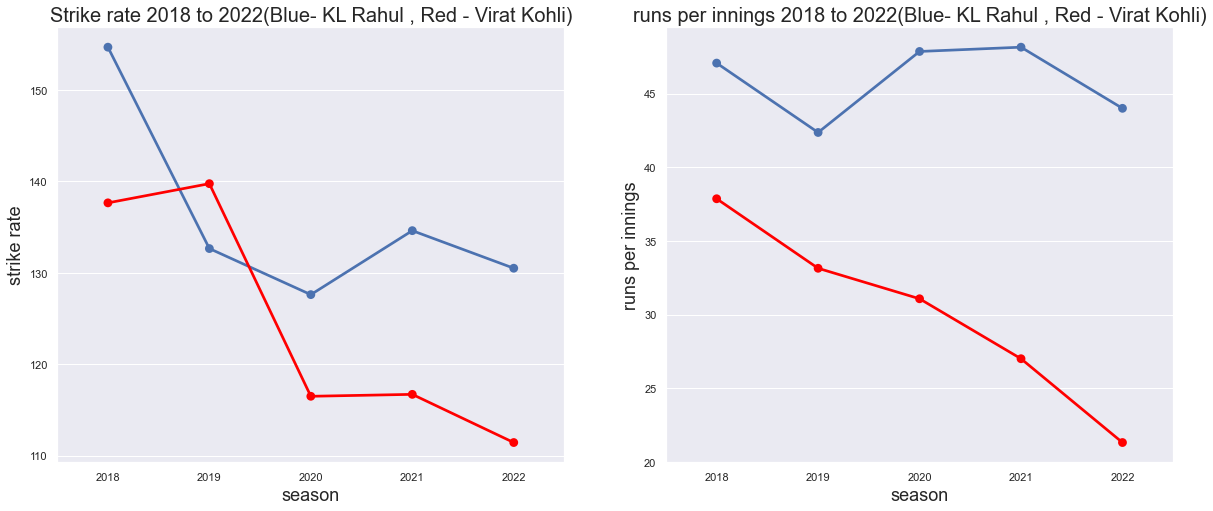

In [520]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['strike rate'] , label = 'KL Rahul')
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['strike rate'], color = 'red' , label ='Virat')
plt.xlabel('season' , fontsize =18)
plt.ylabel('strike rate', fontsize =18)
plt.title('Strike rate 2018 to 2022(Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)


plt.subplot(1,2,2)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['runs per innings'] , label = 'KL Rahul')
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['runs per innings'] ,color = 'red' , label='Virat')
plt.xlabel('season' , fontsize =18)
plt.ylabel('runs per innings', fontsize =18)
plt.title('runs per innings 2018 to 2022(Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)
plt.show()

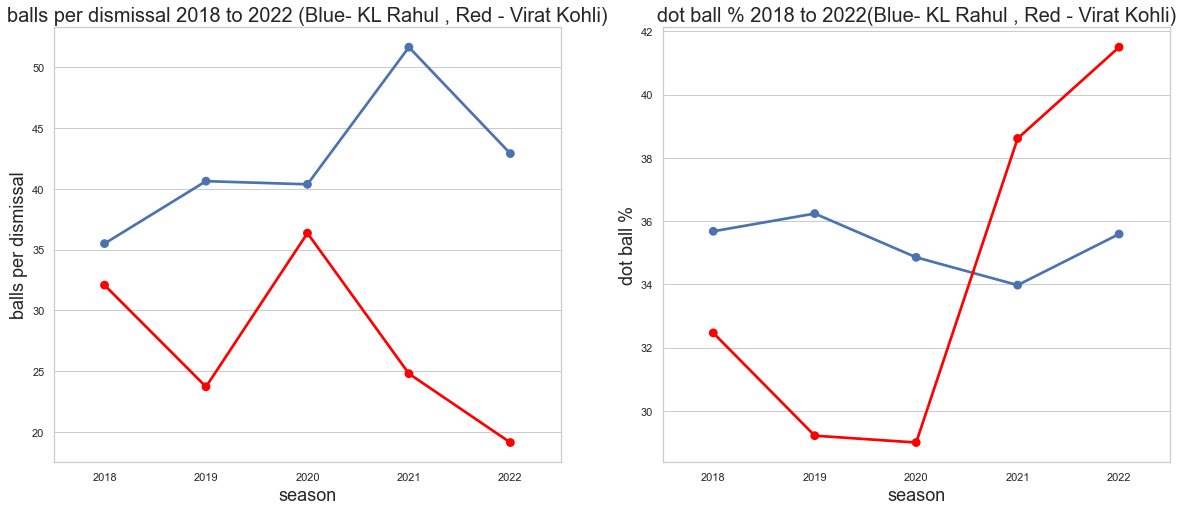

In [509]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['balls per dismissal'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['balls per dismissal'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('balls per dismissal', fontsize =18)
plt.title('balls per dismissal 2018 to 2022(Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)



plt.subplot(1,2,2)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['dot%'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['dot%'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('dot ball %', fontsize =18)
plt.title('dot ball % 2018 to 2022(Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)
plt.show()

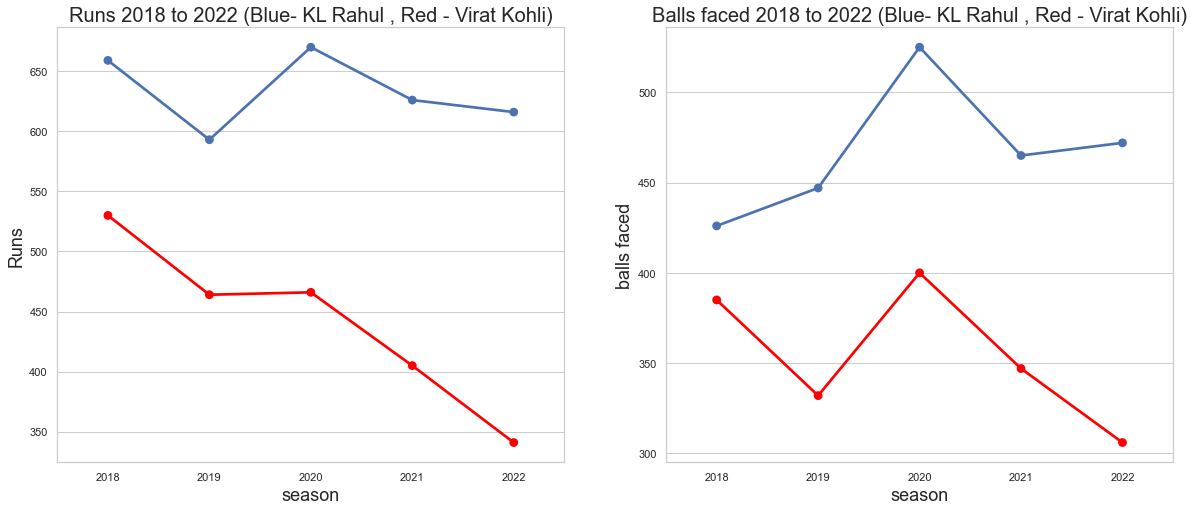

In [507]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['runs'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['runs'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('Runs', fontsize =18)
plt.title('Runs 2018 to 2022 (Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)



plt.subplot(1,2,2)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['balls'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['balls'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('balls faced', fontsize =18)
plt.title('Balls faced 2018 to 2022 (Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)
plt.show()

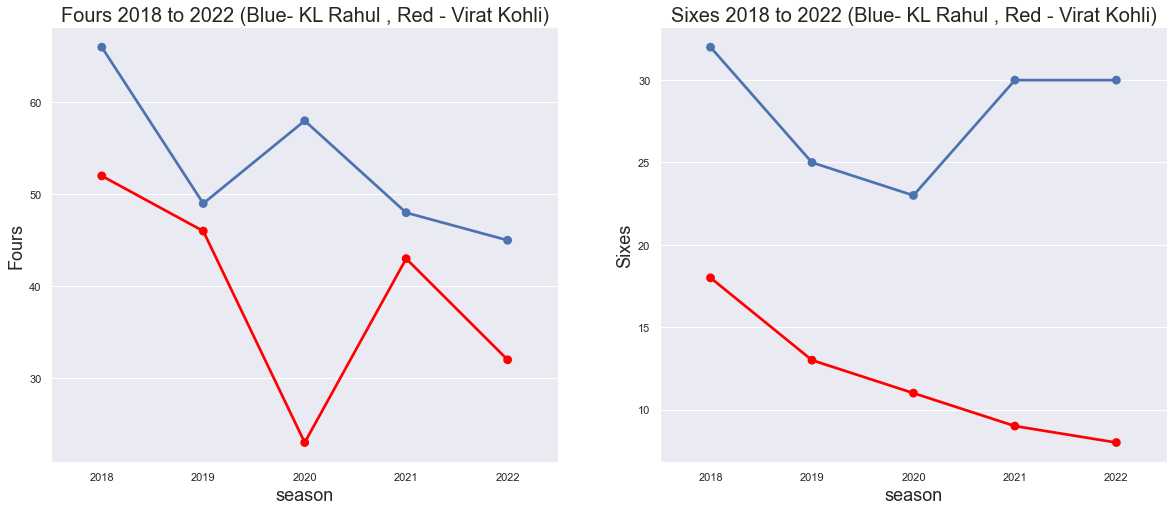

In [528]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['fours'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['fours'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('Fours', fontsize =18)
plt.title('Fours 2018 to 2022 (Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)



plt.subplot(1,2,2)
sns.pointplot(kl_rahul_stats_by_season_2018_2022['season'] , kl_rahul_stats_by_season_2018_2022['sixes'])
sns.pointplot(virat_stats_by_season_2018_2022['season'] , virat_stats_by_season_2018_2022['sixes'] , color= 'red')
plt.xlabel('season' , fontsize =18)
plt.ylabel('Sixes', fontsize =18)
plt.title('Sixes 2018 to 2022 (Blue- KL Rahul , Red - Virat Kohli)', fontsize =20)
plt.show()

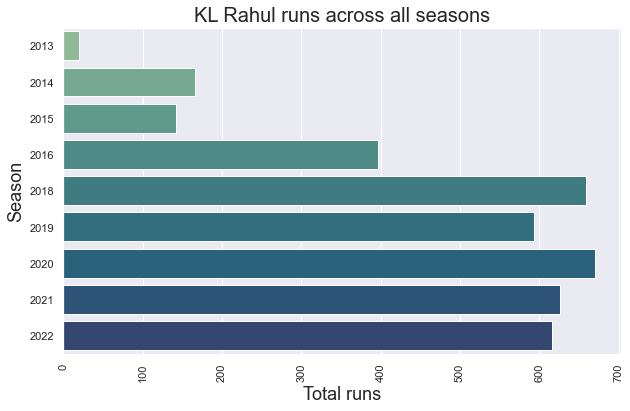

In [524]:
plt.figure(figsize=(10,6))
sns.barplot(kl_rahul_stats_by_season['runs'], kl_rahul_stats_by_season['season'], palette='crest')
plt.xticks(rotation='vertical')
plt.xlabel('Total runs' , fontsize=18)
plt.ylabel('Season' , fontsize=18)
plt.title('KL Rahul runs across all seasons' , fontsize=20)
plt.show()

# Unknown stats:

In [537]:
virat.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
132,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,I Sharma,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,2,2,Powerplay,0,0,4,82,0.0
133,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.3,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,I Sharma,0,4,0.0,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,2,3,Powerplay,0,4,8,82,0.0


In [538]:
kl_rahul.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
81325,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.2,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,152,0.0
81326,598017,2013,2013-04-16,M Chinnaswamy Stadium,2,0.3,Royal Challengers Bangalore,Delhi Daredevils,KL Rahul,CH Gayle,A Nehra,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,3,Powerplay,0,0,1,152,0.0


In [550]:
virat.groupby('over_num')['isSix'].sum().sort_values(ascending= False).head(1)

over_num
18    20
Name: isSix, dtype: int64

In [551]:
virat.groupby('over_num')['isFour'].sum().sort_values(ascending= False).head(1)

over_num
4    49
Name: isFour, dtype: int64

In [552]:
virat.groupby('over_num')['isDot'].sum().sort_values(ascending= False).head(1)

over_num
2    157
Name: isDot, dtype: int64

In [553]:
virat[virat['player_dismissed'] == 'V Kohli'].groupby('over_num')['player_dismissed'].count().sort_values(ascending= False).head(1)

over_num
16    15
Name: player_dismissed, dtype: int64

In [554]:
virat.groupby('over_num')['runs_off_bat'].sum().sort_values(ascending= False).head(1)

over_num
4    398
Name: runs_off_bat, dtype: int64

In [555]:
kl_rahul.groupby('over_num')['isDot'].sum().sort_values(ascending= False).head(1)

over_num
1    145
Name: isDot, dtype: int64

In [556]:
kl_rahul.groupby('over_num')['isFour'].sum().sort_values(ascending= False).head(1)

over_num
4    38
Name: isFour, dtype: int64

In [557]:
kl_rahul.groupby('over_num')['isSix'].sum().sort_values(ascending= False).head(1)

over_num
4    13
Name: isSix, dtype: int64

In [558]:
kl_rahul.groupby('over_num')['runs_off_bat'].sum().sort_values(ascending= False).head(1)

over_num
4    316
Name: runs_off_bat, dtype: int64

In [560]:
kl_rahul[kl_rahul['player_dismissed'] == 'KL Rahul'].groupby('over_num')['player_dismissed'].count().sort_values(ascending= False).head(1)

over_num
11    7
Name: player_dismissed, dtype: int64

In [593]:
batting[batting['balls'] >=2000].sort_values(by = 'dot%' , ascending= False).head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
102,CH Gayle,141,4965,3502,124,1634,1012,91,3,405,357,141.78,35.21,28.24,4.60,46.66
82,BB McCullum,109,2880,2267,102,1025,713,103,3,293,130,127.04,26.42,22.23,5.36,45.21


In [595]:
batting[batting['balls'] >=2000].sort_values(by = 'strike rate' , ascending= False).head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
25,AB de Villiers,170,5162,3479,122,1113,1417,268,17,413,251,148.38,30.36,28.52,5.24,31.99
102,CH Gayle,141,4965,3502,124,1634,1012,91,3,405,357,141.78,35.21,28.24,4.60,46.66
234,KA Pollard,168,3412,2433,118,962,869,152,8,218,223,140.24,20.31,20.62,5.52,39.54
557,YK Pathan,153,3204,2330,105,872,877,155,5,262,159,137.51,20.94,22.19,5.53,37.42
123,DA Warner,162,5881,4308,135,1633,1513,345,23,577,216,136.51,36.30,31.91,5.43,37.91


In [599]:
batting[batting['balls'] >=2000].sort_values(by = 'dismissals' , ascending= False).head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,strike rate,runs per innings,balls Per dismissal,balls per boundary,dot%
400,RG Sharma,221,5879,4629,192,1778,1835,248,7,519,241,127.00,26.60,24.11,6.09,38.41
531,V Kohli,215,6624,5262,181,1886,2181,378,19,579,219,125.88,30.81,29.07,6.59,35.84
420,RV Uthappa,197,4952,3925,175,1598,1416,230,15,481,182,126.17,25.14,22.43,5.92,40.71
430,S Dhawan,205,6244,5081,173,1958,1981,279,23,701,137,122.89,30.46,29.37,6.06,38.54
460,SK Raina,200,5528,4174,161,1475,1708,270,11,506,203,132.44,27.64,25.93,5.89,35.34


In [600]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,1,Powerplay,0,1,1,222,0.0
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,2,Powerplay,0,0,1,222,0.0
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,3,Powerplay,0,1,2,222,1.0
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,4,Powerplay,0,0,2,222,0.0
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,5,Powerplay,0,0,2,222,0.0


In [601]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,over_num,ball_num,Phase_of_play,isBowlerWk,runs,current_score,Total_score,runs_not_counting_for_maiden_overs
225949,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.3,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,18,3,Death,0,1,124,133,1.0
225950,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.4,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,18,4,Death,0,0,124,133,0.0
225951,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.5,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,R Ashwin,1,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,18,5,Death,0,1,125,133,1.0
225952,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,17.6,Gujarat Titans,Rajasthan Royals,DA Miller,Shubman Gill,R Ashwin,2,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,18,6,Death,0,2,127,133,2.0
225953,1312200,2022,2022-05-29,"Narendra Modi Stadium, Ahmedabad",2,18.1,Gujarat Titans,Rajasthan Royals,Shubman Gill,DA Miller,OC McCoy,6,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,19,1,Death,0,6,133,133,6.0


In [603]:
df.groupby(['over_num'])['isSix'].sum().sort_values(ascending =False)

over_num
20    866
19    835
18    835
16    704
17    683
15    624
14    589
13    575
5     508
6     503
12    502
11    479
4     473
9     466
3     425
10    415
8     401
7     308
2     305
1     155
Name: isSix, dtype: int64

In [605]:
df.groupby(['over_num'])['isFour'].sum().sort_values(ascending =False)

over_num
4     1911
5     1883
6     1850
3     1840
2     1690
1     1428
17    1253
18    1235
19    1183
15    1149
20    1093
16    1067
14    1043
12    1033
9     1014
11    1012
10    993 
8     962 
13    944 
7     894 
Name: isFour, dtype: int64

In [608]:
df[df['over_num'] == 1].groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(5)

striker
DA Warner    424
S Dhawan     413
AM Rahane    333
CH Gayle     322
V Kohli      316
Name: runs_off_bat, dtype: int64

In [610]:
df[df['over_num'] == 1].groupby(['bowler'])['runs'].sum().sort_values(ascending = False).head(5)

bowler
B Kumar           503
P Kumar           462
Z Khan            407
Sandeep Sharma    407
DL Chahar         405
Name: runs, dtype: int64

In [609]:
df[df['over_num'] == 20].groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(5)

striker
MS Dhoni      655
KA Pollard    405
RA Jadeja     308
HH Pandya     256
RG Sharma     248
Name: runs_off_bat, dtype: int64

In [611]:
df[df['over_num'] == 20].groupby(['bowler'])['runs'].sum().sort_values(ascending = False).head(5)

bowler
DJ Bravo         618
B Kumar          398
R Vinay Kumar    387
UT Yadav         339
AB Dinda         276
Name: runs, dtype: int64

In [615]:
df[df['wicket_type'] == 'run out'].groupby('striker')['player_dismissed'].count().sort_values(ascending = False).head(5)

striker
MS Dhoni      24
RG Sharma     20
V Kohli       19
KD Karthik    18
S Dhawan      16
Name: player_dismissed, dtype: int64

In [616]:
df[df['wicket_type'] == 'run out'].groupby('non_striker')['player_dismissed'].count().sort_values(ascending = False).head(5)

non_striker
KD Karthik        19
SK Raina          18
RV Uthappa        17
AB de Villiers    16
RG Sharma         16
Name: player_dismissed, dtype: int64

In [620]:
df[df['wicket_type'] == 'run out'].groupby('player_dismissed')['player_dismissed'].count().sort_values(ascending = False).head(10)

player_dismissed
S Dhawan           16
G Gambhir          16
SK Raina           15
AT Rayudu          15
AB de Villiers     14
KD Karthik         13
M Vijay            12
Y Venugopal Rao    11
YK Pathan          11
RG Sharma          11
Name: player_dismissed, dtype: int64

In [633]:
df[(df['wicket_type'] == 'run out')].groupby('non_striker')['player_dismissed'].count().sort_values(ascending = False).head(10)

non_striker
KD Karthik        19
SK Raina          18
RV Uthappa        17
AB de Villiers    16
RG Sharma         16
YK Pathan         14
M Vijay           13
S Dhawan          13
AM Rahane         12
PA Patel          11
Name: player_dismissed, dtype: int64